<div>
<img src="https://www.ul.ie/themes/custom/ul/logo.jpg" />
</div>

#**MSc in Artificial Intelligence and Machine Learning**
##CS6271 - Evolutionary Algorithms and Humanoid Robotics 2024
### Kaggle Competition


Module Leader: Conor Ryan

Developer: Allan De Lima

Link to access the competition: https://www.kaggle.com/competitions/cs-6271-2024-5-final-project

Link to join the competition: https://www.kaggle.com/t/017d7291cce043fcb79fb087b6a78437



Developers:

Mahendran Jinachandran - 24088951

Thendral Balakrishnan - 24128902

## Introduction

Predict whether a pacient has diabetes. This is a shorter version of the also known as "Diabetes" dataset.

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from google.colab import drive
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Dataset

**Class:**

output: 1, 0.


**Listing of features:**

HighBP

HighChol

CholCheck

BMI

Smoker

Stroke

HeartDiseaseorAttack

PhysActivity

Fruits

Veggies

HvyAlcoholConsump

AnyHealthcare

NoDocbcCost

GenHlth

MentHlth

PhysHlth

DiffWalk

Sex

Age

Education

Income

### Load the dataset

In [ ]:
# Suppressing Warnings:
warnings.filterwarnings("ignore")

# To display all the columns so that we can see the datatype easily
pd.set_option('display.max_columns', None)

## mount your Google drive
# 1) run this cell
# 2) sign in
# 3) verify your drive is mounted
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Clone the GRAPE repository at first because the dataset to be used is already there.

In [ ]:
import os
# Get the library from our BDS research Group
# copy the path from your drive
PATH = '/content/drive/MyDrive/grape/'

# check if 'grape' already exists
if os.path.exists(PATH):
    print('grape directory already exists')
else:
    %cd /content/drive/MyDrive/
    !git clone https://github.com/bdsul/grape.git
    print('Cloning grape in your Drive')

# change directory to 'grape'
%cd /content/drive/MyDrive/grape/

grape directory already exists
/content/drive/MyDrive/grape


Now you have a grape folder in your Drive account.

Upload the files training.csv and test.csv from the competition to the folder grape/datasets in your Drive before running the next cells.

### Train set

In [ ]:
# load train set
train_file = 'datasets/train.csv'
df_train = pd.read_csv(PATH+train_file)
df_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,output
0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,7.0,6.0,8.0,0.0
1,1.0,1.0,1.0,35.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0,0.0
2,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,13.0,5.0,4.0,0.0
3,0.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,4.0,6.0,0.0
4,1.0,0.0,1.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,8.0,5.0,7.0,0.0


In [ ]:
df_train.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,output
count,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000
mean,0.513883,0.493653,0.972035,29.447441,0.473225,0.050377,0.133082,0.728877,0.616025,0.801666,0.057715,0.958945,0.085879,2.702102,3.617017,5.195954,0.207061,0.447441,8.376041,4.958548,5.852836,0.356010
std,0.499857,0.500009,0.164889,7.080019,0.499332,0.218743,0.339697,0.444583,0.486400,0.398785,0.233227,0.198437,0.280213,1.106379,7.997166,9.538762,0.405240,0.497279,2.920253,1.018217,2.131317,0.478866
min,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,0.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,5.000000,0.000000,1.000000,10.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


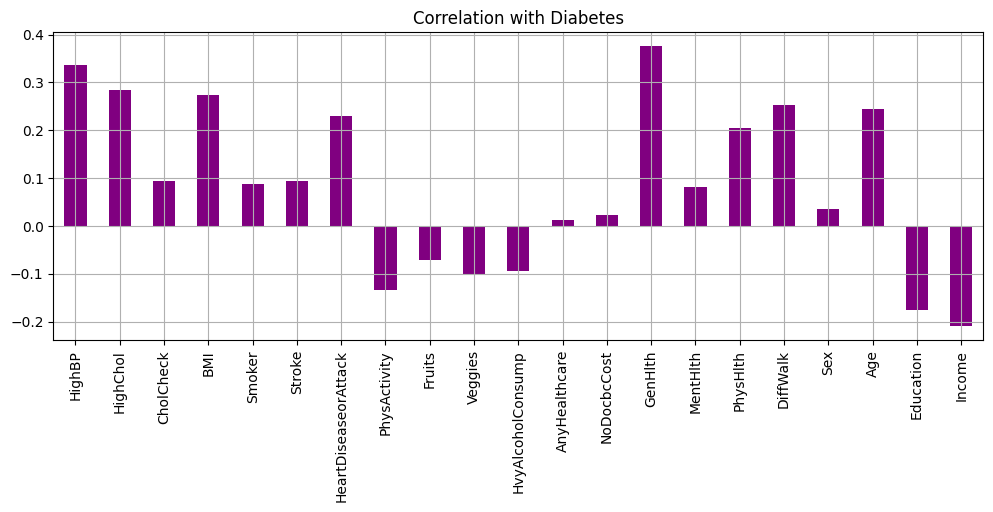

In [ ]:
features_only = df_train.drop('output', axis=1)
correlation_with_output = features_only.corrwith(df_train['output'])
correlation_with_output.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    color="purple",
    title="Correlation with Diabetes"
)

plt.show()

This chart shows how different factors relate to diabetes. Bars above zero mean that as these factors increase (like high blood pressure, cholesterol, and BMI), diabetes becomes more likely. Bars below zero suggest the opposite; for instance, higher education and income seem linked to a lower chance of diabetes. Overall, the chart gives a quick view of which factors are most closely tied to diabetes risk.

Text(0.5, 1.0, 'correlation of feature')

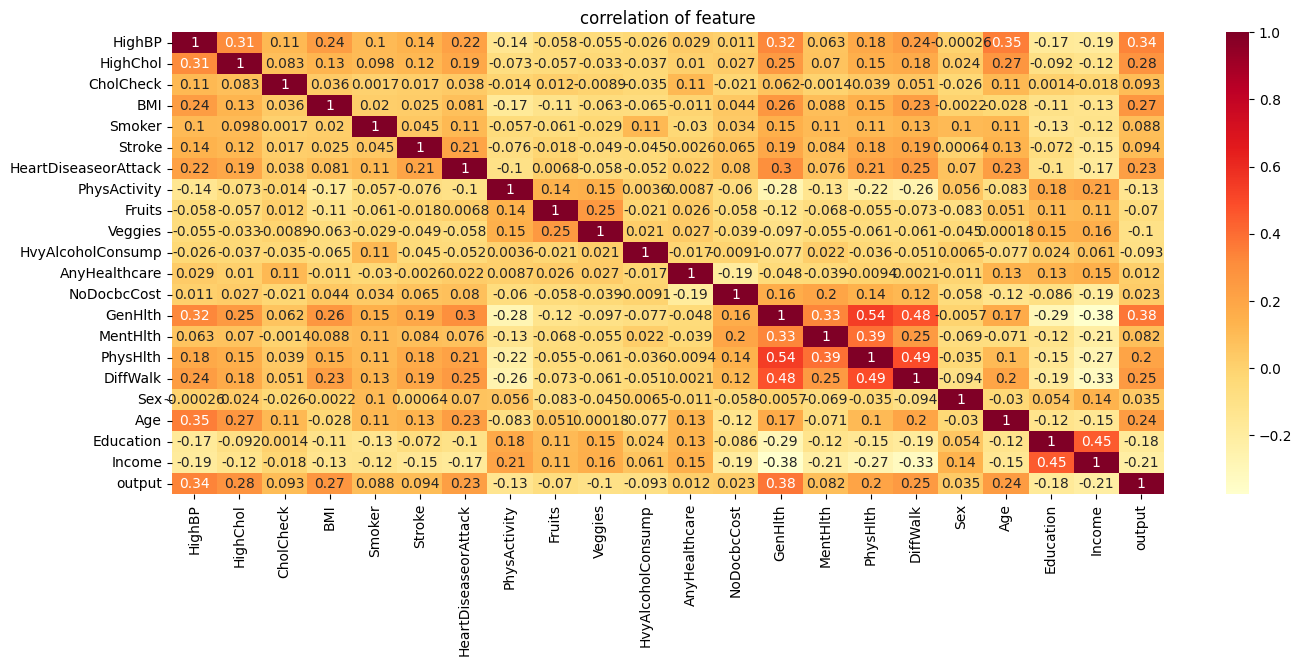

In [ ]:
plt.figure(figsize = (16,6))
sns.heatmap(df_train.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")


The heatmap shows the correlation between different features and their relationship with each other, including diabetes (labeled as "output"). Darker colors represent stronger correlations, either positive (closer to 1) or negative (closer to -1). For example, features like age, high blood pressure (HighBP), and general health (GenHlth) have relatively strong positive correlations with diabetes, while education and income have weaker, negative correlations with it. This visualization helps to identify which factors might influence or relate closely to diabetes and each other.

 # Scaling Data

We explored various scaling methods, including MinMaxScaler, StandardScaler, and RobustScaler. Among these, StandardScaler demonstrated the most favorable results. Therefore, we have selected StandardScaler as the preferred scaling method for further analysis.

In [ ]:
scaler = StandardScaler()
def perform_standard_scaling(data, is_train):

  df = data.copy()
  features_to_scale = ["BMI", "Veggies","MentHlth","GenHlth","PhysHlth","Age","Education", "Income"]
  if is_train:
    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
  else:
    df[features_to_scale] = scaler.transform(df[features_to_scale])
  return df

In [ ]:
X_train = df_train.copy()
X_train.drop(['output'], axis=1, inplace=True)

# Performing scaling in the data
X_train = perform_standard_scaling(X_train, True)

In [ ]:
y_train = df_train['output'].to_numpy()

In [ ]:
# Display the first 5 rows of the training data's features
print(X_train[0:5])

   HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0     0.0       0.0        1.0 -0.345717     0.0     0.0   
1     1.0       1.0        1.0  0.784335     0.0     0.0   
2     1.0       1.0        1.0 -0.769487     0.0     0.0   
3     0.0       0.0        1.0 -0.769487     1.0     0.0   
4     1.0       0.0        1.0  1.631875     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits   Veggies  HvyAlcoholConsump  \
0                   0.0           1.0     1.0  0.497395                0.0   
1                   1.0           1.0     1.0  0.497395                0.0   
2                   0.0           1.0     1.0  0.497395                0.0   
3                   0.0           1.0     0.0  0.497395                0.0   
4                   0.0           0.0     0.0 -2.010473                0.0   

   AnyHealthcare  NoDocbcCost   GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0 -1.538597 -0.327276 -0.544774       0.0  0.0   
1            1

In [ ]:
# Display the first 5 rows of the training data's prediction
print(y_train[0:5])

[0. 0. 0. 0. 0.]


### Test set

In [ ]:
# load test set
test_file = 'datasets/test.csv'
df_test = pd.read_csv(PATH+test_file)
df_test.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0,1.0,1.0,8.0,4.0,1.0
1,1.0,0.0,1.0,27.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,11.0,6.0,6.0
2,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,1.0,12.0,6.0,6.0
3,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,6.0,3.0
4,1.0,1.0,1.0,32.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,3.0,6.0,1.0,0.0,10.0,5.0,6.0


In [ ]:
df_test.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000
mean,0.508330,0.484239,0.970628,29.262797,0.461442,0.053839,0.125329,0.724427,0.621352,0.798161,0.049152,0.953353,0.088973,2.701891,3.488654,5.155662,0.219573,0.447841,8.362761,4.977642,5.846739
std,0.499933,0.499754,0.168849,6.972092,0.498514,0.225701,0.331093,0.446805,0.485053,0.401375,0.216187,0.210883,0.284707,1.106275,7.819002,9.550624,0.413960,0.497275,2.959191,1.012794,2.136366
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,5.000000,0.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
real_test_data = df_test.copy()

# Display the first 5 rows of the test data's features
print(real_test_data[0:5])

   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       1.0        1.0  28.0     1.0     0.0                   1.0   
1     1.0       0.0        1.0  27.0     1.0     0.0                   1.0   
2     1.0       1.0        1.0  27.0     0.0     0.0                   0.0   
3     0.0       0.0        1.0  27.0     0.0     0.0                   0.0   
4     1.0       1.0        1.0  32.0     1.0     0.0                   1.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0           1.0     0.0      0.0                0.0            0.0   
1           0.0     1.0      1.0                0.0            1.0   
2           1.0     1.0      1.0                0.0            1.0   
3           1.0     0.0      1.0                0.0            1.0   
4           0.0     0.0      0.0                0.0            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      4.0       2

You will need to prepare both training and test datasets before working with a Machine Learning method.

Consider you need to use some encoding method with categorical data.

You are free to use any other pre-processing ideas.

Convert the datasets to NumPy to easily use them.

In [ ]:
# data features
X_train = X_train.to_numpy()

## GRAPE

<div>
<img src="https://drive.google.com/uc?export=view&id=1hw43Oi3lGTCkspQ0ged2bZB8q2EpcPhz" width="150"/>
</div>

GRammatical Algorithms in Python for Evolution (GRAPE)


In [ ]:
!pip install deap
import grape
import algorithms
from os import path
from deap import creator, base, tools
import random
import csv
from sklearn.metrics import accuracy_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.1 MB/s eta 0:00:00


You can import functions to be used with your grammar from [functions.py](https://github.com/UL-BDS/grape/blob/main/functions.py) on GRAPE repository and / or you can define your own functions.

In [ ]:
from functions import add, sub, mul, pdiv, psqrt, plog, and_, or_, nand_, nor_, not_, if_, less_than_or_equal, greater_than_or_equal

'heartDisease.bnf' is a grammar used for another problem just to check if everything is working well.

Write your own grammar in a text file and save it in your Drive account.

Put the whole address on GRAMMAR_FILE and print to check it.

In [ ]:
# We have used our own Grammar and saved it in the heart Disease file.
GRAMMAR_FILE = 'heartDisease.bnf'
f = open("grammars/" + GRAMMAR_FILE, "r")
print(f.read())
f.close()

<log_op> ::= <conditional_branches> | and_(<log_op>,<log_op>) | or_(<log_op>,<log_op>) | not_(<log_op>) | <boolean_feature>

<conditional_branches> ::= if_(<log_op>,<conditional_branches>,<conditional_branches>) | less_than_or_equal(<num_op>,<num_op>) | greater_than_or_equal(<num_op>,<num_op>)

<num_op> ::= add(<num_op>,<num_op>) | sub(<num_op>,<num_op>) | mul(<num_op>,<num_op>) | pdiv(<num_op>,<num_op>) | <nonboolean_feature>

<nonboolean_feature> ::= x[3]|x[13]|x[14]|x[15]|x[18]|x[19]|x[20]

<boolean_feature> ::= x[0]|x[1]|x[2]|x[4]|x[5]|x[6]|x[7]|x[8]|x[9]|x[10]|x[11]|x[12]|x[16]|x[17]|<c><c>.<c><c>

<c>  ::= 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9


Run the following cell to put your grammar on the class Grammar.

In [ ]:
BNF_GRAMMAR = grape.Grammar(path.join("grammars", GRAMMAR_FILE))

The fitness function here is the percentage of outputs wrongly predicted.

You can write your own fitness function if you prefer.

In [ ]:
def fitness_eval(individual, points):
    """
    Fitness Function
    """

    x = points[0]
    Y = points[1]

    if individual.invalid == True:
        return np.NaN,

    # Evaluate the expression
    try:
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        return np.NaN,
    assert np.isrealobj(pred)

    compare = np.equal(Y,pred)
    fitness = 1 - np.mean(compare)

    return fitness,

To use properly the fitness function above with GRAPE, the features must be in the lines, and the samples must be in the columns, so if your data is not like that, you need to transpose the matrix.

Take a look at the print. If you run this cell two times, the matrix will be transposed again and will not work properly.

In [ ]:
X_train = np.transpose(X_train)
print('Training (X,Y):\t', X_train.shape, y_train.shape)

Training (X,Y):	 (21, 5042) (5042,)


Set the Grammatical Evolution parameters.

Make sure you set a random seed just in case we need to re-run your experiments.

In [ ]:
POPULATION_SIZE = 1000
MAX_GENERATIONS = 250
P_CROSSOVER = 0.9
P_MUTATION = 0.02
ELITE_SIZE = 1
HALL_OF_FAME_SIZE = 3

TOURNAMENT_SIZE = 3
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

CODON_CONSUMPTION = 'lazy'
GENOME_REPRESENTATION = 'list'
MAX_GENOME_LENGTH = None

MAX_INIT_TREE_DEPTH = 10
MIN_INIT_TREE_DEPTH = 3
MAX_TREE_DEPTH = 20
MAX_WRAPS = 0
CODON_SIZE = 255

REPORT_ITEMS = ['gen', 'invalid', 'avg', 'std', 'min', 'max',
                'best_ind_length', 'avg_length',
                'best_ind_nodes', 'avg_nodes',
                'best_ind_depth', 'avg_depth',
                'avg_used_codons', 'best_ind_used_codons',
                'structural_diversity', 'fitness_diversity',
                'selection_time', 'generation_time']

Create a toolbox.

In [ ]:
def create_Toolbox():
  toolbox = base.Toolbox()

  # define a single objective, minimising fitness strategy:
  creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

  creator.create('Individual', grape.Individual, fitness=creator.FitnessMin)

  toolbox.register("populationCreator", grape.sensible_initialisation, creator.Individual)

  toolbox.register("evaluate", fitness_eval)

  # Tournament selection:
  toolbox.register("select", tools.selTournament, tournsize=TOURNAMENT_SIZE)

  # Single-point crossover:
  toolbox.register("mate", grape.crossover_onepoint)

  # Flip-int mutation:
  toolbox.register("mutate", grape.mutation_int_flip_per_codon)
  return toolbox

In [ ]:
toolbox = create_Toolbox()

In [ ]:
# create initial population (generation 0):
population = toolbox.populationCreator(pop_size=POPULATION_SIZE,
                                           bnf_grammar=BNF_GRAMMAR,
                                           min_init_depth=MIN_INIT_TREE_DEPTH,
                                           max_init_depth=MAX_INIT_TREE_DEPTH,
                                           codon_size=CODON_SIZE,
                                           codon_consumption=CODON_CONSUMPTION,
                                           genome_representation=GENOME_REPRESENTATION
                                            )

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# prepare the statistics object:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

Run Grammatical Evolution.

In [ ]:
population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                              bnf_grammar=BNF_GRAMMAR,
                                              codon_size=CODON_SIZE,
                                              max_tree_depth=MAX_TREE_DEPTH,
                                              max_genome_length=MAX_GENOME_LENGTH,
                                              points_train=[X_train, y_train],
                                              codon_consumption=CODON_CONSUMPTION,
                                              report_items=REPORT_ITEMS,
                                              genome_representation=GENOME_REPRESENTATION,
                                              stats=stats, halloffame=hof, verbose=False)

gen = 0 , Best fitness = (0.3153510511701706,)
gen = 1 , Best fitness = (0.29293930979769933,) , Number of invalids = 262
gen = 2 , Best fitness = (0.29293930979769933,) , Number of invalids = 109
gen = 3 , Best fitness = (0.29293930979769933,) , Number of invalids = 74
gen = 4 , Best fitness = (0.29293930979769933,) , Number of invalids = 44
gen = 5 , Best fitness = (0.29293930979769933,) , Number of invalids = 39
gen = 6 , Best fitness = (0.29293930979769933,) , Number of invalids = 38
gen = 7 , Best fitness = (0.29293930979769933,) , Number of invalids = 34
gen = 8 , Best fitness = (0.29293930979769933,) , Number of invalids = 49
gen = 9 , Best fitness = (0.29293930979769933,) , Number of invalids = 26
gen = 10 , Best fitness = (0.29293930979769933,) , Number of invalids = 35
gen = 11 , Best fitness = (0.29293930979769933,) , Number of invalids = 33
gen = 12 , Best fitness = (0.29293930979769933,) , Number of invalids = 29
gen = 13 , Best fitness = (0.29293930979769933,) , Number of

Show the best individual as an expression.

In [ ]:
# Best individual
import textwrap
best = hof.items[0].phenotype
print("Best individual: \n","\n".join(textwrap.wrap(best,80)))
print("\nTraining Fitness: ", hof.items[0].fitness.values[0])

Best individual: 
 and_(and_(x[2],or_(x[5],and_(or_(x[6],x[2]),or_(x[6],and_(or_(x[16],x[1]),x[0]))
))),if_(or_(or_(x[16],x[17]),x[11]),less_than_or_equal(sub(x[20],x[13]),add(x[20
],x[3])),greater_than_or_equal(x[20],mul(x[3],add(mul(pdiv(x[14],mul(x[13],x[19]
)),x[20]),x[13])))))

Training Fitness:  0.25585085283617615


In [38]:
def predict_train(individual, X , y_test):
    x = X

    if individual.invalid == True:
        return np.NaN,

    try:
      def evaluate_expression(x):
          X = x
          try:
              pred = eval(individual.phenotype)
          except (TypeError, ValueError, NameError):
              pred = np.nan
          return pred

      pred = np.apply_along_axis(evaluate_expression,0,x)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        return np.NaN,

    pred = np.nan_to_num(pred, nan=-1).astype(int)

    y_test = y_test.astype(int)
    pred = pred.astype(int)
    acc = accuracy_score(y_test, pred)

    return pred , acc

In [ ]:
def predict_test(individual, X  ):
    x = X

    if individual.invalid == True:
        return np.NaN,

    try:
      def evaluate_expression(x):
          X = x
          try:
              pred = eval(individual.phenotype)
          except (TypeError, ValueError, NameError):
              pred = np.nan
          return pred

      pred = np.apply_along_axis(evaluate_expression,0,x)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        return np.NaN,

    pred = np.nan_to_num(pred, nan=-1)
    pred = pred.astype(int)
    return pred

In [ ]:
real_test_data = perform_standard_scaling(real_test_data, False)
real_test_data = np.transpose(real_test_data)
print(real_test_data.shape)

(21, 95804)


In [41]:
print(hof.items[0].phenotype)
print("Training Fitness: ", hof.items[0].fitness.values[0])

y_pred_train , acc = predict_train(hof.items[0], X_train, y_train)

print("Predicted classes of the training set: ", y_pred_train)
print("Accuracy of the training set: ", acc)

and_(and_(x[2],or_(x[5],and_(or_(x[6],x[2]),or_(x[6],and_(or_(x[16],x[1]),x[0]))))),if_(or_(or_(x[16],x[17]),x[11]),less_than_or_equal(sub(x[20],x[13]),add(x[20],x[3])),greater_than_or_equal(x[20],mul(x[3],add(mul(pdiv(x[14],mul(x[13],x[19])),x[20]),x[13])))))
Training Fitness:  0.25585085283617615
Predicted classes of the training set:  [0 1 0 ... 0 1 0]
Accuracy of the training set:  0.7441491471638239


In [42]:
testing_prediction = predict_test(hof.items[0], real_test_data)
print("Predicted classes of the test set: ", testing_prediction)

Predicted classes of the test set:  [1 0 0 ... 0 1 0]


In [43]:
results = pd.DataFrame(list(zip(range(95805), testing_prediction)), columns=['index', 'output']).astype(int)
display(results)

,index,output
0,0,1
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
95799,95799,0
95800,95800,0
95801,95801,0
95802,95802,1


In [44]:
results.to_csv('/content/sample_data/submission.csv', index=False)